# GIFGIF dataset

Plots the performance of different active learning strategies on the [GIFGIF dataset](http://lucas.maystre.ch/gifgif-data).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import thesis

from thesis.robustsort import plots

%matplotlib inline

In [2]:
thesis.setup_plotting()

Thesis settings loaded!


## Load the data

In [3]:
with open("data/gifgif-1m.pickle", "rb") as f:
    data = pickle.load(f)
disp = data["disp"]
xs = data["xs"]

## Plot it

/Users/maystre/.virtualenvs/thesis/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


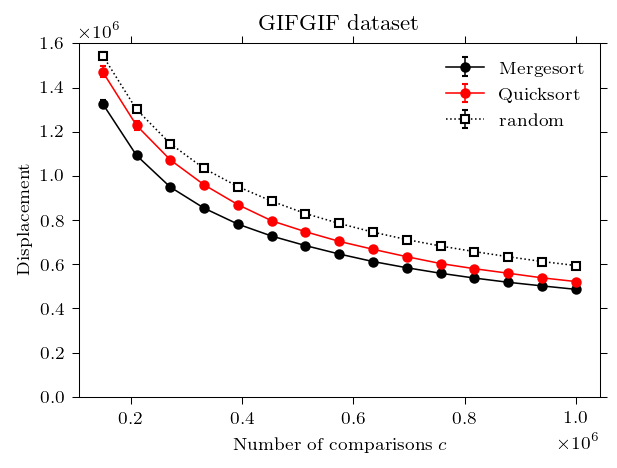

In [4]:
fig, ax = plt.subplots(figsize=(4.25, 3.25))

for s in ("mergesort", "quicksort", "random"):
    mean, std = disp[s]
    ax.errorbar(xs, mean, yerr=std, label=plots.label[s],
            linewidth=0.75, capsize=1.5,
            color=plots.c[s], linestyle=plots.ls[s],
            marker=plots.marker[s], markerfacecolor=plots.mfc[s])
    ax.xaxis.get_major_formatter().set_powerlimits((0, 1))
    ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
    ax.legend()
    ax.set_ylim(ymin=0, ymax=1600000)
    ax.set_xlabel("Number of comparisons $c$")
    ax.set_ylabel("Displacement")
    ax.set_title("GIFGIF dataset")

fig.savefig("gifgif.pdf")